# Movielens Dataset N Ratings Per Year Analysis

In [1]:
# Center All Plots
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

## Load Libraries

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

## Configure

In [5]:
# Load Dataset
movies = pd.read_csv(r'C:/Users/Yukawa/datasets/ml-latest/movies.csv')
movies.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [6]:
ratings = pd.read_csv(r'C:/Users/Yukawa/datasets/ml-latest/ratings.csv')
ratings.head(10)

,userId,movieId,rating,timestamp
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456
2,1,1091,1.5,1256677471
3,1,1257,4.5,1256677460
4,1,1449,4.5,1256677264
5,1,1590,2.5,1256677236
6,1,1591,1.5,1256677475
7,1,2134,4.5,1256677464
8,1,2478,4.0,1256677239
9,1,2840,3.0,1256677500


In [7]:
# Organise Ratings
ratings.sort_values(by='movieId', inplace=True)
ratings.reset_index(inplace=True, drop= True)
ratings.head(10)

,userId,movieId,rating,timestamp
0,220887,1,4.5,1092109888
1,240345,1,3.5,1178465853
2,32915,1,5.0,853372427
3,37924,1,4.0,864374892
4,30387,1,4.0,1454443907
5,246135,1,3.0,833226546
6,227134,1,3.0,861100052
7,121824,1,3.5,1150523603
8,237595,1,3.5,1442661860
9,136792,1,5.0,861141495


In [8]:
# Split title and release year in separate columns in movies dataframe. Convert year to timestamp.
movies['year'] = movies.title.str.extract("\((\d{4})\)", expand=True)
movies.year = pd.to_datetime(movies.year, format='%Y')
movies.year = movies.year.dt.year # As there are some NaN years, resulting type will be float (decimals)
movies.title = movies.title.str[:-7]
movies.head(10)

,movieId,title,genres,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995.0
1,2,Jumanji,Adventure|Children|Fantasy,1995.0
2,3,Grumpier Old Men,Comedy|Romance,1995.0
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995.0
4,5,Father of the Bride Part II,Comedy,1995.0
5,6,Heat,Action|Crime|Thriller,1995.0
6,7,Sabrina,Comedy|Romance,1995.0
7,8,Tom and Huck,Adventure|Children,1995.0
8,9,Sudden Death,Action,1995.0
9,10,GoldenEye,Action|Adventure|Thriller,1995.0


In [9]:
# Categorize movies genres properly. 
genres_unique = pd.DataFrame(movies.genres.str.split('|').tolist()).stack().unique()
genres_unique

array(['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Mystery', 'Sci-Fi', 'IMAX', 'Documentary', 'War', 'Musical',
       'Western', 'Film-Noir', '(no genres listed)'], dtype=object)

In [10]:
genres_unique = pd.DataFrame(genres_unique, columns=['genres']) # Format into DataFrame to store later
genres_unique

,genres
0,Adventure
1,Animation
2,Children
3,Comedy
4,Fantasy
5,Romance
6,Drama
7,Action
8,Crime
9,Thriller


In [11]:
movies = movies.join(movies.genres.str.get_dummies().astype(bool))
movies.drop('genres', inplace=True, axis=1)

In [12]:
# Modify rating timestamp format (from seconds to datetime year)

ratings.timestamp = pd.to_datetime(ratings.timestamp, unit='s', origin='unix')
ratings.timestamp.head()

0   2004-08-10 03:51:28
1   2007-05-06 15:37:33
2   1997-01-15 23:53:47
3   1997-05-23 08:08:12
4   2016-02-02 20:11:47
Name: timestamp, dtype: datetime64[ns]

In [13]:
# Check and clean NaN values
print ("Number of movies Null values: ", max(movies.isnull().sum()))
print ("Number of ratings Null values: ", max(ratings.isnull().sum()))
movies.dropna(inplace=True)
ratings.dropna(inplace=True)
    
# Organise a bit, then save into feather-formatand clear from memory
movies.sort_values(by='movieId', inplace=True)
ratings.sort_values(by='movieId', inplace=True)
movies.reset_index(inplace=True, drop=True)
ratings.reset_index(inplace=True, drop=True)

Number of movies Null values:  327
Number of ratings Null values:  0


In [14]:
ratings

,userId,movieId,rating,timestamp
0,220887,1,4.5,2004-08-10 03:51:28
1,135139,1,3.0,1997-10-20 21:12:48
2,107968,1,3.0,2005-03-23 00:31:51
3,235760,1,3.5,2006-01-22 14:19:09
4,30273,1,5.0,2001-06-10 04:49:34
...,...,...,...,...
27753439,176871,193878,2.0,2018-09-25 11:31:20
27753440,81710,193880,2.0,2018-09-25 14:37:12
27753441,33330,193882,2.0,2018-09-25 15:48:32
27753442,226715,193886,4.0,2018-09-25 22:56:17


##  Explore The Movielens Dataset

### Number of Ratings Per Year

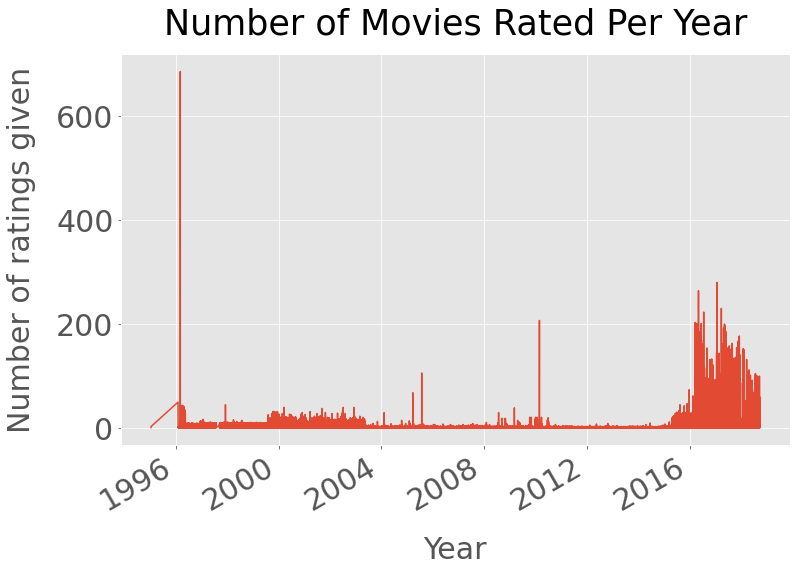

In [15]:
ratings_per_year = ratings[['rating', 'timestamp']].groupby('timestamp').count()
ratings_per_year.columns = ['Rating Count']
ax1 = ratings_per_year.plot(kind='line',figsize=(12,8))
ax1.set_xlabel('Year', labelpad=20, fontsize=30)
ax1.set_ylabel('Number of ratings given', labelpad=20, fontsize=30)
plt.title('Number of Movies Rated Per Year', pad=20,fontsize=35)
ax1.get_legend().remove()
ax1.tick_params(axis='both', which='major', labelsize=30)
plt.show()

In [16]:
ratings_df = ratings[['rating', 'timestamp']].groupby('timestamp').count().sort_values(by="rating", ascending=False)
ratings_df.head( )

,rating
timestamp,
1996-03-01 00:00:00,685
2017-01-26 17:09:55,280
2016-05-07 19:03:34,264
2017-03-29 03:31:35,230
2016-07-21 00:01:04,223


In [17]:
for i in range(0, 20):
    if ratings_df.iloc[i]['rating'] > 15:
        ratings_df.iloc[i]['rating'] = 15

In [18]:
ratings_df.head(15)

,rating
timestamp,
1996-03-01 00:00:00,15
2017-01-26 17:09:55,15
2016-05-07 19:03:34,15
2017-03-29 03:31:35,15
2016-07-21 00:01:04,15
2016-05-07 19:03:31,15
2016-05-07 19:03:30,15
2010-02-25 22:00:19,15
2016-03-17 23:26:46,15


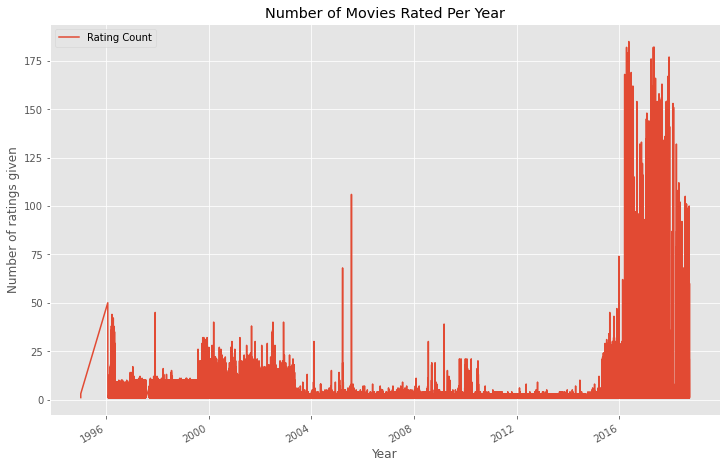

In [19]:
ratings_per_year = ratings_df.copy()
ratings_per_year.columns = ['Rating Count']
ax1 = ratings_per_year.plot(kind='line',figsize=(12,8))
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of ratings given')
plt.title('Number of Movies Rated Per Year')
plt.show()

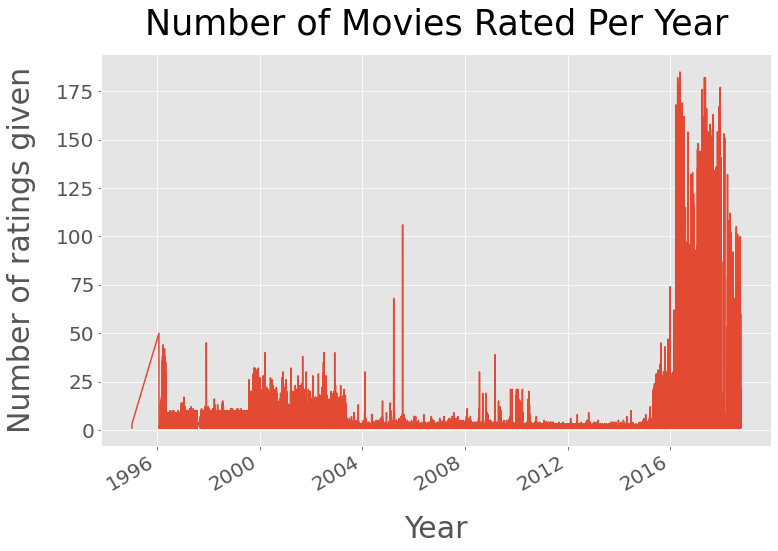

In [20]:
ratings_per_year = ratings_df.copy()
ratings_per_year.columns = ['Rating Count']
ax1 = ratings_per_year.plot(kind='line',figsize=(12,8))
ax1.set_xlabel('Year', labelpad=20, fontsize=30)
ax1.set_ylabel('Number of ratings given', labelpad=20, fontsize=30)
plt.title('Number of Movies Rated Per Year', pad=20,fontsize=35)
ax1.get_legend().remove()
ax1.tick_params(axis='both', which='major', labelsize=20)
plt.show()